<a href="https://colab.research.google.com/github/SonaliAnand24/Customer_Churn/blob/main/Job_a_thon_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [ ]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix, classification_report,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE  # tO balance the distribution

# **Dataset review and Preparation**

This section will seek to explore the structure of our data:
*   To understand the input space i.e. the data set.
*   To prepare the sets for exploratory and prediction tasks.

In [ ]:
# Read the data frame and checking tha dimension of our data
train = pd.read_csv('/content/train_PDjVQMB.csv', delimiter=',')
train.shape

(6650, 11)

The train dataframe has 6650 rows with 11 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling.

In [ ]:
# Check columns list and missing values
train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

Well there is no missing values in our data!

In [ ]:
# Get unique count for each variable
train.nunique()

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

From the above, we will not require the first attribute (ID) as this is specific to a customer so excluding this won't effect our model performance.

# **The statistical summary of the dataset**

In [ ]:
#lets describe data 
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [ ]:
#Viewing complete information of the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


# **Dropping Irrelevant Feature**
ID is irrelevant as explained above, so we can drop this feature.

In [ ]:
# Drop the columns as explained above
train = train.drop(["ID"], axis = 1)

# **Data Visualization**

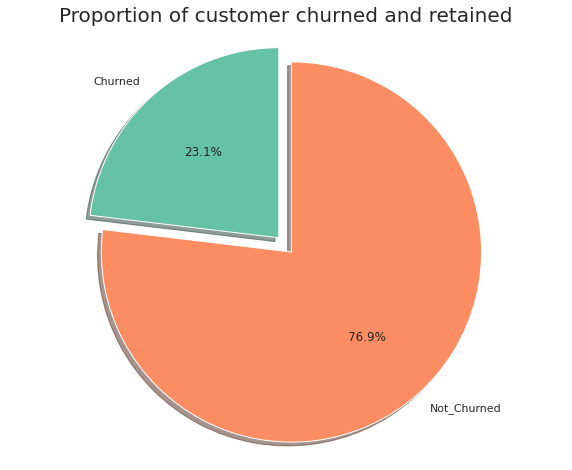

In [ ]:
labels = 'Churned', 'Not_Churned'
sizes = [train.Is_Churn[train['Is_Churn']==1].count(), train.Is_Churn[train['Is_Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 23.1% of the customers have churned. So the baseline model could be to predict that 23.1% of the customers will churn. Given 23.1% is a small number, we need to ensure that the chosen model does predict with great accuracy this 23.1% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

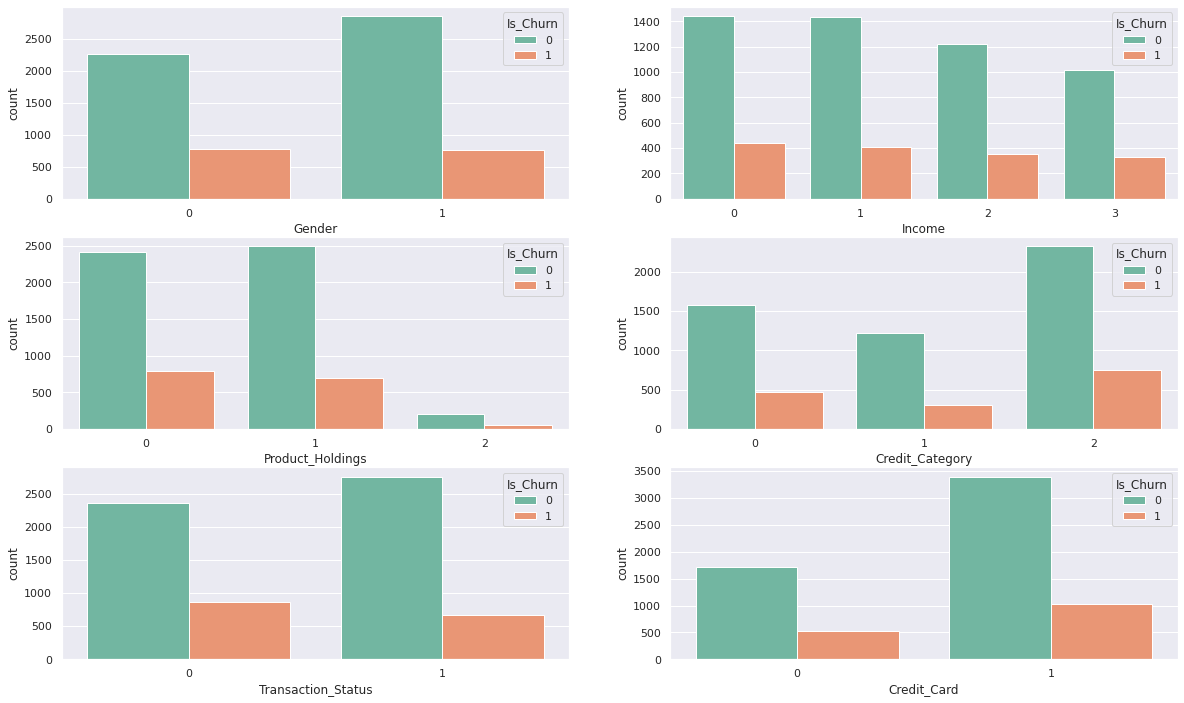

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Gender', hue = 'Is_Churn',data = train, ax=axarr[0][0])
sns.countplot(x='Income', hue = 'Is_Churn',data = train, ax=axarr[0][1])
sns.countplot(x='Product_Holdings', hue = 'Is_Churn',data = train, ax=axarr[1][0])
sns.countplot(x='Credit_Category', hue = 'Is_Churn',data = train, ax=axarr[1][1])
sns.countplot(x='Transaction_Status', hue = 'Is_Churn',data = train, ax=axarr[2][0])
sns.countplot(x='Credit_Card', hue = 'Is_Churn',data = train, ax=axarr[2][1])

**We note the following:**




*   Customer with income more than 15L has greater chance of churning compared to others with low Income.
*   Customer with less number of products holding with bank has greater chance of churning.
*   Customer with high credit score has low chance of churning as compared to customer with average and low credit score.
*   customer who hasn't done any transaction in the past 3 months have high proportion of churning as compared to who has done transaction recently.
*   Given that majority of the customers have credit cards could prove this to be just a coincidence.

In [ ]:
encoder = LabelEncoder()
train["Income"] = encoder.fit_transform(train["Income"])
train["Gender"] = encoder.fit_transform(train["Gender"])
train["Credit_Category"] = encoder.fit_transform(train["Credit_Category"])
train["Product_Holdings"] = encoder.fit_transform(train["Product_Holdings"])

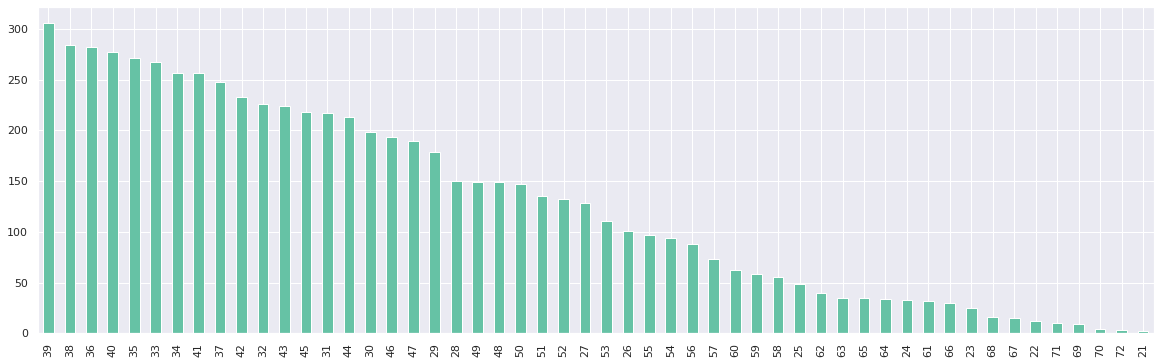

In [ ]:
train["Age"].value_counts().plot.bar(figsize=(20,6))

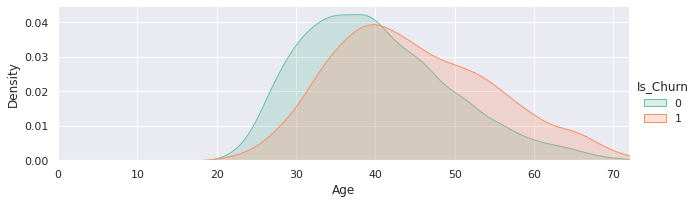

In [ ]:
facet = sns.FacetGrid(train, hue="Is_Churn",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

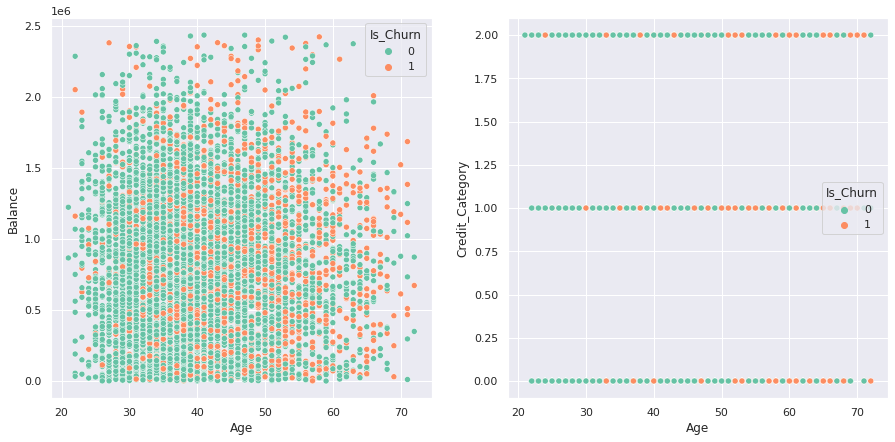

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Is_Churn", cmap = cmap, sizes = (10, 200), data = train, ax=ax[0])
sns.scatterplot(x = "Age", y = "Credit_Category", hue = "Is_Churn", cmap = cmap, sizes = (10, 200), data = train, ax=ax[1])



*   **40 to 70 years old customers are higher chances to churn.**   



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


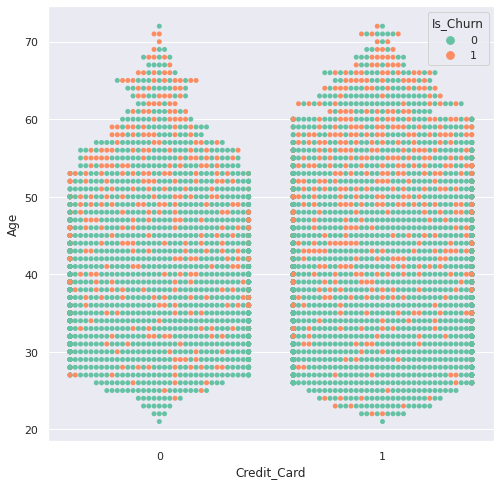

In [ ]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "Credit_Card", y = "Age", data = train, hue="Is_Churn")

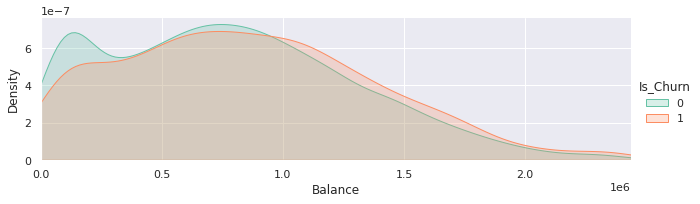

In [ ]:
facet = sns.FacetGrid(train, hue="Is_Churn",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, train["Balance"].max()))
facet.add_legend()

plt.show()

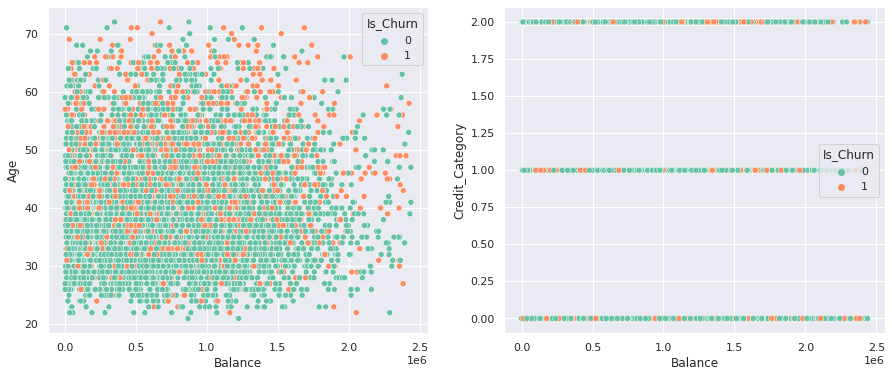

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = train, hue="Is_Churn", ax = ax[0])
sns.scatterplot(x = "Balance", y = "Credit_Category", data = train, hue="Is_Churn", ax = ax[1])

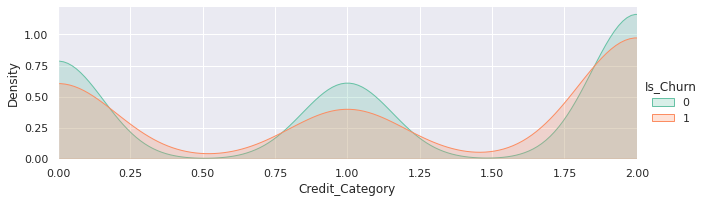

In [ ]:
facet = sns.FacetGrid(train, hue="Is_Churn",aspect=3)
facet.map(sns.kdeplot,"Credit_Category",shade= True)
facet.set(xlim=(0, train["Credit_Category"].max()))
facet.add_legend()

plt.show()

**Detecting Outliers using Tukey Boxplot**

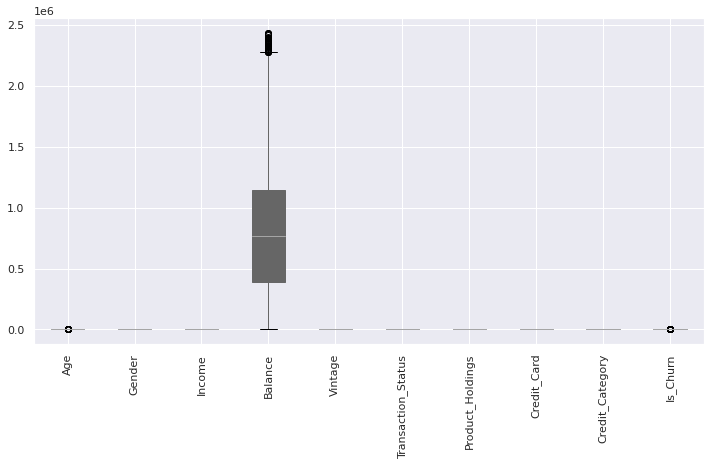

In [ ]:
plt.figure(figsize=(12,6))
bplot = train.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

Whiskers here in balance boxplot shows the outliers presents.

**Checking Correlation**

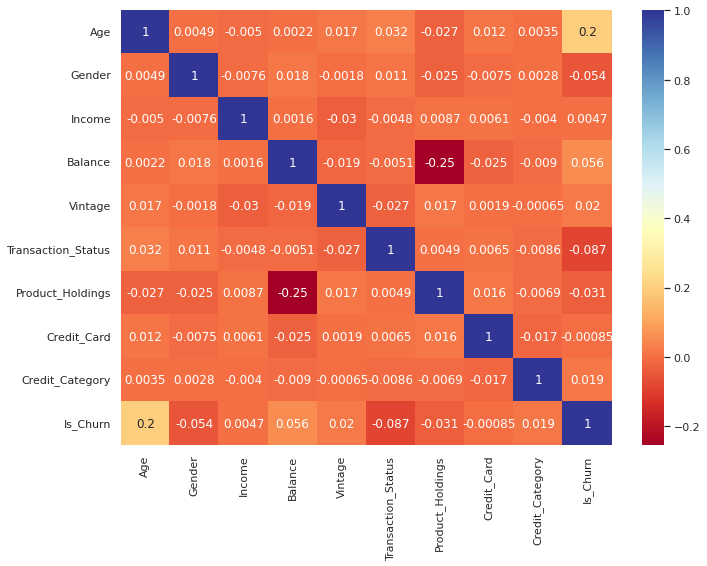

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(train.corr(), annot=True, cmap="RdYlBu")
plt.show()


*   Age has high correlation with Is_Churn, Vintage, Credit_Card and Gender.
*   Gender has high correlation with Balance and Transaction_Status.
*   Income has hiogh correlation with Balance.



# **Prediction with ML models:**

In [ ]:
X = train.drop("Is_Churn", axis=1)
y = train["Is_Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
clfNB = GaussianNB()
clfNB.fit(X_train, y_train)
pred = clfNB.predict(X_test)
accuracy_score(pred, y_test)

0.7744360902255639

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54      1030
           1       0.26      0.72      0.38       300

    accuracy                           0.47      1330
   macro avg       0.55      0.56      0.46      1330
weighted avg       0.70      0.47      0.50      1330



In [ ]:
clfLR = LogisticRegression()
clfLR.fit(X_train, y_train)
pred = clfLR.predict(X_test)
accuracy_score(pred, y_test)

0.7744360902255639

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54      1030
           1       0.26      0.72      0.38       300

    accuracy                           0.47      1330
   macro avg       0.55      0.56      0.46      1330
weighted avg       0.70      0.47      0.50      1330



In [ ]:
clfDC = tree.DecisionTreeClassifier()
clfDC.fit(X_train, y_train)
pred = clfDC.predict(X_test)
accuracy_score(pred, y_test)

0.6421052631578947

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54      1030
           1       0.26      0.72      0.38       300

    accuracy                           0.47      1330
   macro avg       0.55      0.56      0.46      1330
weighted avg       0.70      0.47      0.50      1330



In [ ]:
clfRF = RandomForestClassifier(n_estimators = 200, random_state=200)
clfRF.fit(X_train, y_train)
pred = clfRF.predict(X_test)
accuracy_score(pred, y_test)

0.7609022556390977

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54      1030
           1       0.26      0.72      0.38       300

    accuracy                           0.47      1330
   macro avg       0.55      0.56      0.46      1330
weighted avg       0.70      0.47      0.50      1330



In [ ]:
clfX  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clfX.fit(X_train, y_train)
pred = clfX.predict(X_test)
accuracy_score(pred, y_test)

0.7421052631578947

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54      1030
           1       0.26      0.72      0.38       300

    accuracy                           0.47      1330
   macro avg       0.55      0.56      0.46      1330
weighted avg       0.70      0.47      0.50      1330



# **Data prep for model fitting**

In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = [ 'Age', 'Vintage', 'Balance','TenureByAge','CreditScoreGivenAge', 'IncomeBalanceRatio']
cat_vars = ['Credit_card', 'Product_Holdings', 'Credit_Category', 'Transaction_Status','Income', 'Gender']
df_train = df_train[['Is_Churn'] + continuous_vars + cat_vars]
df_train.head()

# **Data Normalization**

In [ ]:
scaler = MinMaxScaler() 

bumpy_features = ["Credit_Card", "Age", "Balance",'Income']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [ ]:
df_scaled.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.294118,0,0.333333,0.231148,4,0,0,0.0,0
1,0.627451,0,0.666667,0.359323,2,1,0,1.0,2
2,0.274510,0,1.000000,0.287925,2,1,1,0.0,2
3,0.431373,0,1.000000,0.572062,0,1,1,1.0,2
4,0.352941,0,1.000000,0.366536,1,1,0,1.0,1


# **Over Sampling**

In [ ]:
X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

In [ ]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8225806451612904
Precision: 0.8873072360616845
Recall: 0.7362204724409449
F1: 0.8047337278106509
Area under precision (AUC) Recall: 0.7842410448112173


In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1030
           1       0.89      0.74      0.80      1016

    accuracy                           0.82      2046
   macro avg       0.83      0.82      0.82      2046
weighted avg       0.83      0.82      0.82      2046



# **Loading and making Test Data ready for applying to the model.**

In [ ]:
test = pd.read_csv('/content/test_lTY72QC.csv', delimiter=',')
test.shape

(2851, 10)

In [ ]:
# Drop the columns as explained above
test = test.drop(["ID"], axis = 1)
test.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [ ]:
enc = LabelEncoder()
test["Income"] = enc.fit_transform(test["Income"])
test["Gender"] = enc.fit_transform(test["Gender"])
test["Credit_Category"] = enc.fit_transform(test["Credit_Category"])
test["Product_Holdings"] = enc.fit_transform(test["Product_Holdings"])

In [ ]:
# Get unique count for each variable
test.nunique()

Age                     52
Gender                   2
Income                   4
Balance               2847
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
dtype: int64

In [ ]:
#Viewing complete information of the testing data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2851 non-null   int64  
 1   Gender              2851 non-null   int64  
 2   Income              2851 non-null   int64  
 3   Balance             2851 non-null   float64
 4   Vintage             2851 non-null   int64  
 5   Transaction_Status  2851 non-null   int64  
 6   Product_Holdings    2851 non-null   int64  
 7   Credit_Card         2851 non-null   int64  
 8   Credit_Category     2851 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 200.6 KB


In [ ]:
#Model prediction on test data
test_pred = clf.predict(test)

In [ ]:
# Adding Is_Churn column to the test_pred in order to make it as dataframe
df = pd.DataFrame(test_pred,columns=['Is_Churn'])
df.head()

,Is_Churn
0,0
1,0
2,1
3,1
4,0


In [ ]:
# reading the provided csv file for submission sample
solution = pd.read_csv('/content/sample_OoSmYo5.csv')
solution.head()

,ID,Is_Churn
0,55480787,1
1,9aededf2,1
2,a5034a09,1
3,b3256702,1
4,dc28adb5,1


In [ ]:
# Transferring the predicted dataframe's Is_Churn column's value to the solution dataframe's Is_Churn column
solution['Is_Churn']=df['Is_Churn']
solution.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,1
3,b3256702,1
4,dc28adb5,0


In [ ]:
# Writing the dataframe to the csv file.
solution.to_csv('/content/submission.csv',index=False)